In [3]:
# singly-linked list data structure
#
class LinkedList:

    # initial values for the properties of an empty LinkedList object
    #
    # they begin with an understore to mark that they should not
    # be accessed directly from outside, only through methods
    #
    def __init__(self):
        self._head = None
        self._tail = None
    
    # inserts an additional item at the head of the list
    #
    def push_front(self, value):
        new_node = LinkedListNode()
        new_node.set_item(value)
        if self.is_empty():
            self._tail = new_node  # if the list is empty, the new node also becomes its tail
        new_node.set_next(self._head)  # the old head is attached to the new element
        self._head = new_node  # the new node now becomes the new head of the list
    
    # insert an item right after a given node;
    # precondition/contract: the node must belong to the present list
    #
    def push_after(self, node, value):
        new_node = LinkedListNode()
        if not node.has_next():  # check whether we are inserting at the end of the list
            self._tail = new_node   # if that is the case, the new node becomes the tail of the list
        new_node.set_item(value)
        new_node.set_next(node.get_next())
        node.set_next(new_node)
    
    # inserts an additional item at the end of the list
    #
    def push_back(self, value):
        if not self.is_empty():
            self.push_after(self._tail, value)
        else:
            self.push_front(value)
    
    # removes the head element from the list, returning its value
    #
    def pop_front(self):
        old_head_value = self._head.get_item()  # access value of the old head element
        new_head_node = self._head.get_next()
        self._head.set_next(None)  # detach the head from the list (not strictly required)
        self._head = new_head_node  # designate its previous successor as the new head node
        return old_head_value
    
    # removes the successor element of a given node from the list, returning its value;
    # precondition/contract: the node must belong to the present list
    #
    def pop_after(self, node):
        if node.has_next():
            old_successor_node = node.get_next()
            if old_successor_node.has_next():
                new_successor_node = old_successor_node.get_next()
                old_successor_node.set_next(None)  # detach the previous successor from the list
                node.set_next(new_successor_node)
            else:
                node.set_next(None)
                self._tail = node  # node becomes the tail element after the previous tail was detached
            return old_successor_node.get_item()
        else:
            return None
    
    # deleting the content would be feasible just by setting head and tail to None
    # for better consistency, we also detach all the nodes, which is not strictly necessary
    #
    def clear(self):
        while not self.is_empty():
            self.pop_front()

    # states whether the list is empty
    #
    def is_empty(self):
        return (self._head is None)
    
    # returns the first node of the list
    #
    def get_head(self):
        return self._head

    # return the number of elements in the linked list
    #
    def length(self):
        if self.is_empty():
            return 0
        iterator = self._head
        nodes = 1
        while iterator.has_next():
            iterator = iterator.get_next()
            nodes += 1
        return nodes

    # returns a string representation of the list, for printing output
    #
    def string(self):
        out = "<"
        if not self.is_empty():
            iterator = self._head
            while iterator.has_next():
                out = out + str(iterator.get_item()) + "; "
                iterator = iterator.get_next()
            out = out + str(iterator.get_item())
        out = out + ">"
        return out
    
    # replaces the content of self with the content of a dyn. array (Python list)
    #
    def copy_from_dynarray(self, dynarray):
        self.clear()  # remove all previous content from the linked list
        for el in dynarray:
            self.push_back(el)  # insert content of the Python list as new content of self

    # replaces the contant of a dyn. array (Python list) with the content of self
    #
    def copy_into_dynarray(self, dynarray):
        dynarray.clear()
        iterator = self._head
        data_left = True
        while data_left:
            dynarray.append(iterator.get_item())
            if iterator.has_next():
                iterator = iterator.get_next()
            else:
                data_left = False

# node in a singly-linked list
#
class LinkedListNode:
    def __init__(self):
        self._item = None
        self._next = None
    
    def set_item(self, value):
        self._item = value
    def set_next(self, next_node):
        self._next = next_node
    
    def get_item(self):
        return self._item
    def get_next(self):
        return self._next
    
    # returns True if there is a next element, false if the next
    # element is None, i.e., if we are at the end of the list
    #
    def has_next(self):
        return (self._next is not None)

In [8]:
# doubly-linked list data structure
#
class DoublyLinkedList:

    # initial values for the properties of an empty LinkedList object
    #
    # they begin with an understore to mark that they should not
    # be accessed directly from outside, only through methods
    #
    def __init__(self):
        self._head = None
        self._tail = None
    
    # inserts an additional item at the head of the list
    #
    def push_front(self, value):
        new_node = DoublyLinkedListNode()
        new_node.set_item(value)
        if self.is_empty():
            self._tail = new_node  # if the list is empty, the new node also becomes its tail
        else:
            self._head.set_prev(new_node)
        new_node.set_next(self._head)  # the old head is attached to the new element
        self._head = new_node  # the new node now becomes the new head of the list
    
    # insert an item right after a given node;
    # precondition/contract: the node must belong to the present list
    #
    def push_after(self, node, value):
        new_node = DoublyLinkedListNode()
        if not node.has_next():  # check whether we are inserting at the end of the list
            self._tail = new_node   # if that is the case, the new node becomes the tail of the list
        else:
            node.get_next().set_prev(new_node)
        new_node.set_item(value)
        new_node.set_next(node.get_next())
        new_node.set_prev(node)
        node.set_next(new_node)
    
    # inserts an additional item at the end of the list
    #
    def push_back(self, value):
        if not self.is_empty():
            self.push_after(self._tail, value)
        else:
            self.push_front(value)
    
    # removes the head element from the list, returning its value
    #
    def pop_front(self):
        old_head_value = self._head.get_item()  # access value of the old head element
        new_head_node = self._head.get_next()
        self._head.set_next(None)  # detach the head from the list (not strictly required)
        self._head.set_prev(None)  # detach the head from the list (not strictly required)
        new_head_node.set_prev(None)
        self._head = new_head_node  # designate its previous successor as the new head node
        return old_head_value
        
    def pop(self, node):
        prev_node = node.get_prev()
        next_node = node.get_next()
        
        if prev_node is None:
            return self.pop_front()
        else:
            prev_node.set_next(next_node)
        if next_node is None:
            self._tail = prev_node
        else:
            next_node.set_prev(prev_node)
            
        node.set_prev(None)
        node.set_next(None)
        return node.get_item()
    
    # deleting the content would be feasible just by setting head and tail to None
    # for better consistency, we also detach all the nodes, which is not strictly necessary
    #
    def clear(self):
        while not self.is_empty():
            self.pop_front()

    # states whether the list is empty
    #
    def is_empty(self):
        return (self._head is None)
    
    # returns the first node of the list
    #
    def get_head(self):
        return self._head

    # return the number of elements in the linked list
    #
    def length(self):
        if self.is_empty():
            return 0
        iterator = self._head
        nodes = 1
        while iterator.has_next():
            iterator = iterator.get_next()
            nodes += 1
        return nodes

    # returns a string representation of the list, for printing output
    #
    def string(self):
        out = "<"
        if not self.is_empty():
            iterator = self._head
            while iterator.has_next():
                out = out + str(iterator.get_item()) + "; "
                iterator = iterator.get_next()
            out = out + str(iterator.get_item())
        out = out + ">"
        return out
    
    # replaces the content of self with the content of a dyn. array (Python list)
    #
    def copy_from_dynarray(self, dynarray):
        self.clear()  # remove all previous content from the linked list
        for el in dynarray:
            self.push_back(el)  # insert content of the Python list as new content of self

    # replaces the contant of a dyn. array (Python list) with the content of self
    #
    def copy_into_dynarray(self, dynarray):
        dynarray.clear()
        iterator = self._head
        data_left = True
        while data_left:
            dynarray.append(iterator.get_item())
            if iterator.has_next():
                iterator = iterator.get_next()
            else:
                data_left = False

# node in a doubly-linked list
#
class DoublyLinkedListNode:
    
    def __init__(self):
        self._prev = None
        self._item = None
        self._next = None
    
    def set_item(self, value):
        self._item = value
    def set_next(self, next_node):
        self._next = next_node
    def set_prev(self, prev_node):
        self._prev = prev_node
    
    def get_item(self):
        return self._item
    def get_next(self):
        return self._next
    def get_prev(self):
        return self._prev
    
    # returns True if there is a next element, false if the next
    # element is None, i.e., if we are at the end of the list
    #
    def has_next(self):
        return (self._next is not None)
    
    # returns True if there is a previous element, false if the previous
    # element is None, i.e., if we are at the head of the list
    #
    def has_prev(self):
        return (self._prev is not None)

In [9]:
import random

random_dynarray = [random.randrange(25) for i in range(5)]
print("random_dynarray:", random_dynarray)

linked_list_copy = LinkedList()
linked_list_copy.copy_from_dynarray(random_dynarray)
print("linked_list_copy:", linked_list_copy.string())
print("length of linked list:", linked_list_copy.length())

doubly_linked_list_copy = DoublyLinkedList()
doubly_linked_list_copy.copy_from_dynarray(random_dynarray)
print("doubly_linked_list_copy:", doubly_linked_list_copy.string())
print("length of doubly linked list:", doubly_linked_list_copy.length())

random_dynarray: [22, 11, 1, 20, 9]
linked_list_copy: <22; 11; 1; 20; 9>
length of linked list: 5
doubly_linked_list_copy: <22; 11; 1; 20; 9>
length of doubly linked list: 5


In [10]:
# Problem/task:
#
# For each element (el) of a list, determine its value modulo three (el % 3),
# and replace it with el % 3 copies of itself, adjacent to each other
#
# Precondition: The argument is a list (Python list or linked list, respectively) of integer numbers
#
# In other words, multiples of three are deleted, values of the type 3k+1 are unchanged,
# and values of the type 3k+2 are copied so that they occur twice, next to each other
#
# For example, [4, 11, 8, 9, 20] should become [4, 11, 11, 8, 8, 20, 20]

# Implementation for a Python list (dynamic array)
#
def mod3_copying_dynarray(dynarray):
    # note that the length of the list changes during this operation;
    # we need the index no. for inserting elements in the middle;
    # therefore a loop over range(...) will be inappropriate
    #
    i = 0
    while i < len(dynarray):
        if dynarray[i] % 3 == 0:
            dynarray.pop(i)  # multiple of 3, remove from list
        elif dynarray[i] % 3 == 2:
            dynarray.insert(i+1, dynarray[i])  # insert a copy of the present value
            i += 2  # jump two forward, to the next value
        else:
            i += 1  # do nothing, proceed to the next value

def mod3_copying_linked_list(linked_list):
    if linked_list.is_empty():
        return
    #
    # special treatment for the head element
    #
    # why is that necessary? the singly linked list distinguishes
    # "pop_after" and "push_after" from "pop_front" and "push_front"
    #
    iterator = linked_list.get_head()
    while iterator.get_item() % 3 == 0:
        linked_list.pop_front()
        iterator = linked_list.get_head()
    if iterator.get_item() % 3 == 2:
        linked_list.push_front(iterator.get_item())
    #
    # now traverse the remainder of the list
    #
    while iterator.has_next():
        previous_node = iterator  # for "pop_after", to detach the present element, we need the previous node
        iterator = iterator.get_next()
        if iterator.get_item() % 3 == 0:
            linked_list.pop_after(previous_node)
            iterator = previous_node
        elif iterator.get_item() % 3 == 2:
            linked_list.push_after(iterator, iterator.get_item())
            iterator = iterator.get_next()

def mod3_copying_doubly_linked_list(linked_list):
    if linked_list.is_empty():
        return
    #
    # special treatment for the head element
    #
    # why is that necessary? the singly linked list distinguishes
    # "pop_after" and "push_after" from "pop_front" and "push_front"
    #
    iterator = linked_list.get_head()
    while iterator.get_item() % 3 == 0:
        linked_list.pop_front()
        iterator = linked_list.get_head()
    if iterator.get_item() % 3 == 2:
        linked_list.push_front(iterator.get_item())
    #
    # now traverse the remainder of the list
    #
    while iterator.has_next():
        previous_node = iterator  # for "pop_after", to detach the present element, we need the previous node
        iterator = iterator.get_next()
        if iterator.get_item() % 3 == 0:
            linked_list.pop(iterator)
            iterator = previous_node
        elif iterator.get_item() % 3 == 2:
            linked_list.push_after(iterator, iterator.get_item())
            iterator = iterator.get_next()

In [5]:
import random

random_dynarray = [random.randrange(25) for i in range(5)]
print("random_dynarray:", random_dynarray)

linked_list_copy = LinkedList()
linked_list_copy.copy_from_dynarray(random_dynarray)
print("linked_list_copy:", linked_list_copy.string())

doubly_linked_list_copy = DoublyLinkedList()
doubly_linked_list_copy.copy_from_dynarray(random_dynarray)
print("doubly_linked_list_copy:", doubly_linked_list_copy.string())

print("\n*** now running the mod-3 copy functions ***\n")

mod3_copying_dynarray(random_dynarray)
mod3_copying_linked_list(linked_list_copy)
mod3_copying_doubly_linked_list(doubly_linked_list_copy)
print("new status of dyn. array:", random_dynarray)
print("new status of linked list:", linked_list_copy.string())
print("new status of doubly linked list:", doubly_linked_list_copy.string())

random_dynarray: [1, 24, 11, 13, 7]
linked_list_copy: <1; 24; 11; 13; 7>
doubly_linked_list_copy: <1; 24; 11; 13; 7>

*** now running the mod-3 copy functions ***

new status of dyn. array: [1, 11, 11, 13, 7]
new status of linked list: <1; 11; 11; 13; 7>
new status of doubly linked list: <1; 11; 11; 13; 7>


In [11]:
import time
import random

step = 50
nmax = 20000
repetitions = 20

perf_dynarray, perf_linked, perf_doubly = {}, {}, {}
random.seed()

for n in range(0, nmax+1, step):
    runtime_dynarray, runtime_linked, runtime_doubly = 0.0, 0.0, 0.0
    list_lengths_dynarray, list_lengths_linked, list_lengths_doubly = 0, 0, 0
    for i in range(repetitions):
        test_dynarray_n = [random.randrange(n*n) for j in range(n)]
        test_linked_n = LinkedList()
        test_linked_n.copy_from_dynarray(test_dynarray_n)
        test_doubly_n = DoublyLinkedList()
        test_doubly_n.copy_from_dynarray(test_dynarray_n)
        
        start = time.time()
        mod3_copying_dynarray(test_dynarray_n)
        runtime_dynarray += time.time() - start
        list_lengths_dynarray += len(test_dynarray_n)
        
        start = time.time()
        mod3_copying_linked_list(test_linked_n)
        runtime_linked += time.time() - start
        list_lengths_linked += test_linked_n.length()
        
        start = time.time()
        mod3_copying_doubly_linked_list(test_doubly_n)
        runtime_doubly += time.time() - start
        list_lengths_doubly += test_linked_n.length()
        
    perf_dynarray[n] = runtime_dynarray / repetitions
    perf_linked[n] = runtime_linked / repetitions
    perf_doubly[n] = runtime_doubly / repetitions
    
    print(n, perf_dynarray[n], perf_linked[n], perf_doubly[n], \
          list_lengths_dynarray/repetitions, list_lengths_linked/repetitions, \
          list_lengths_doubly/repetitions, sep='\t')

0	3.695487976074219e-07	3.5762786865234375e-07	3.933906555175781e-07	0.0	0.0	0.0
50	1.25885009765625e-05	5.868673324584961e-05	6.81757926940918e-05	53.4	53.4	53.4
100	2.657175064086914e-05	0.00014401674270629882	0.00015692710876464845	99.95	99.95	99.95
150	5.443096160888672e-05	0.00025537014007568357	0.0002928018569946289	152.65	152.65	152.65
200	5.491971969604492e-05	0.00022760629653930664	0.00024902820587158203	202.65	202.65	202.65
250	0.0001063704490661621	0.0002963542938232422	0.00034847259521484373	250.8	250.8	250.8
300	8.233785629272461e-05	0.00033566951751708987	0.0003939986228942871	302.1	302.1	302.1
350	8.672475814819336e-05	0.00036193132400512694	0.0004570245742797852	350.65	350.65	350.65
400	0.00010139942169189453	0.00042912960052490237	0.00048089027404785156	396.15	396.15	396.15
450	0.0001543283462524414	0.0005870699882507324	0.0006410837173461914	455.55	455.55	455.55
500	0.00012754201889038087	0.0005024194717407227	0.0005716443061828613	491.95	491.95	491.95
550	0.000145816

4500	0.0030457139015197753	0.005171358585357666	0.005476009845733642	4478.4	4478.4	4478.4
4550	0.003155803680419922	0.005341684818267823	0.005779421329498291	4557.85	4557.85	4557.85
4600	0.003128659725189209	0.005356144905090332	0.005547094345092774	4582.55	4582.55	4582.55
4650	0.0031958937644958494	0.005311727523803711	0.005708253383636475	4643.5	4643.5	4643.5
4700	0.0032829642295837402	0.005523812770843506	0.006183731555938721	4680.15	4680.15	4680.15
4750	0.003353011608123779	0.007384288311004639	0.005582451820373535	4760.55	4760.55	4760.55
4800	0.003184044361114502	0.005216073989868164	0.005514955520629883	4791.85	4791.85	4791.85
4850	0.003285837173461914	0.005474960803985596	0.005704307556152343	4841.6	4841.6	4841.6
4900	0.0035014629364013674	0.005639922618865967	0.006063520908355713	4897.9	4897.9	4897.9
4950	0.0037479519844055174	0.006180095672607422	0.006394350528717041	4959.9	4959.9	4959.9
5000	0.0036728620529174806	0.005781984329223633	0.006223893165588379	5011.25	5011.25	5011.

9050	0.01071866750717163	0.010353124141693116	0.011311757564544677	9055.75	9055.75	9055.75
9100	0.010861194133758545	0.010565590858459473	0.011523723602294922	9100.4	9100.4	9100.4
9150	0.010745608806610107	0.01028205156326294	0.011208140850067138	9159.45	9159.45	9159.45
9200	0.011226022243499756	0.010832691192626953	0.011613202095031739	9197.0	9197.0	9197.0
9250	0.01081315279006958	0.01042952537536621	0.011233901977539063	9266.0	9266.0	9266.0
9300	0.010835695266723632	0.010242033004760741	0.01103801727294922	9294.3	9294.3	9294.3
9350	0.010805296897888183	0.010170280933380127	0.01097111701965332	9319.05	9319.05	9319.05
9400	0.011146724224090576	0.01058337688446045	0.01150122880935669	9368.6	9368.6	9368.6
9450	0.011361896991729736	0.010788464546203613	0.011538565158843994	9462.2	9462.2	9462.2
9500	0.011593127250671386	0.010672259330749511	0.011846554279327393	9524.6	9524.6	9524.6
9550	0.011635160446166993	0.010614848136901856	0.011839807033538818	9545.05	9545.05	9545.05
9600	0.0116557002

KeyboardInterrupt: 

<AxesSubplot:xlabel='input list size', ylabel='average runtime in seconds'>

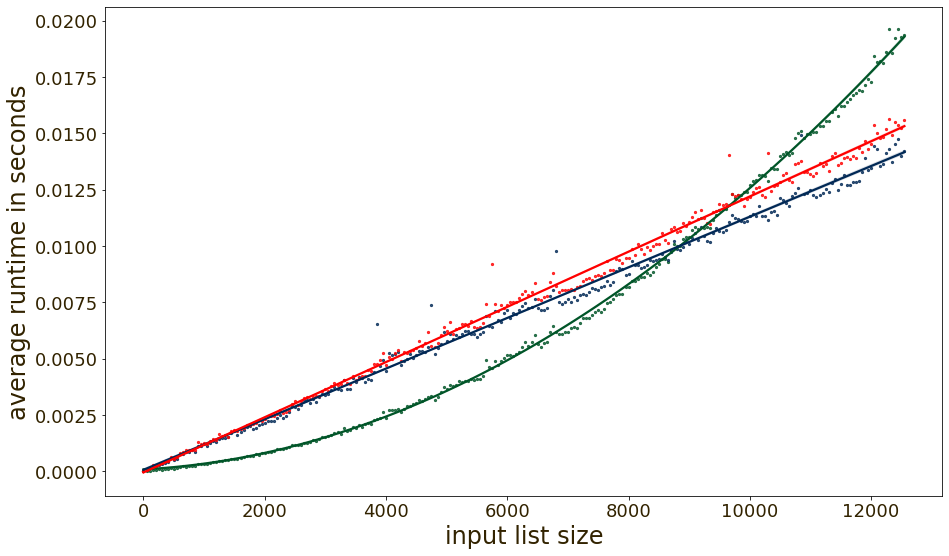

In [13]:
import seaborn as sbn
import matplotlib.pyplot as plt

keylist_dynarray = list(perf_dynarray.keys())
vallist_dynarray = list(perf_dynarray.values())

keylist_linked = list(perf_linked.keys())
vallist_linked = list(perf_linked.values())

keylist_doubly = list(perf_doubly.keys())
vallist_doubly = list(perf_doubly.values())

fig, ax = plt.subplots()
fig.set_size_inches(15, 9)
plt.xticks(fontsize=18, color="#322300")
plt.yticks(fontsize=18, color="#322300")
ax.set_xlabel("input list size", fontsize=24, color="#322300")
ax.set_ylabel("average runtime in seconds", fontsize=24, color="#322300")

sbn.regplot(x=keylist_dynarray, y=vallist_dynarray, color='#005528', \
            order=2, scatter_kws={'s':5})  # green for dynamic array (Python list)
sbn.regplot(x=keylist_linked, y=vallist_linked, color='#002855', \
            order=1, scatter_kws={'s':5})  # blue for singly-linked list
sbn.regplot(x=keylist_doubly, y=vallist_doubly, color='#ff0000', \
            order=1, scatter_kws={'s':5})  # red for doubly-linked list